In [ ]:
!pip install scikit-image

--- Starting Project 2: Hough Circle Detection Analysis (Unit 3) ---

--- Processing: Coins ---
Found 18 circles!


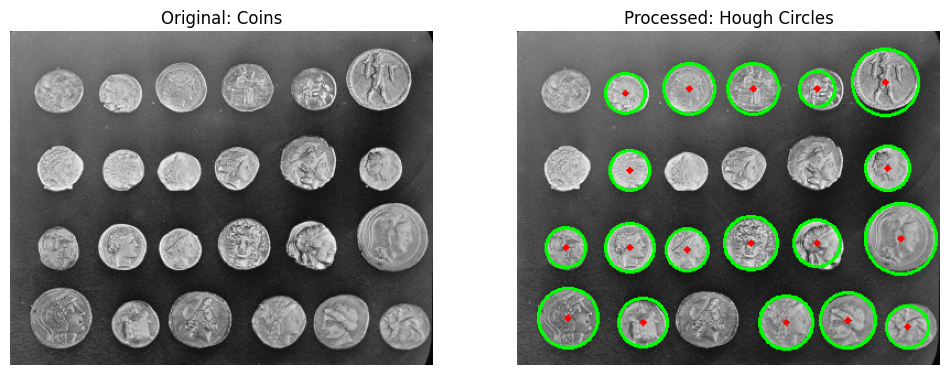


--- Processing: Blobs ---
Found 18 circles!


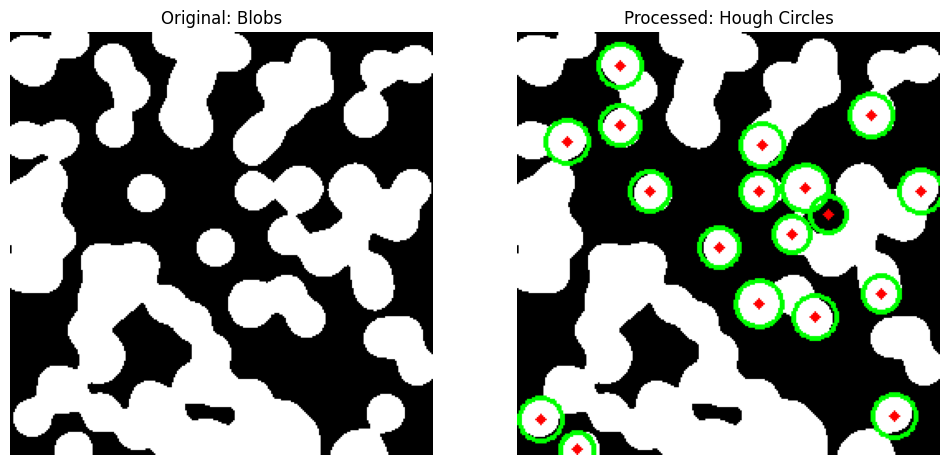


--- Processing: Logo ---
Found 4 circles!


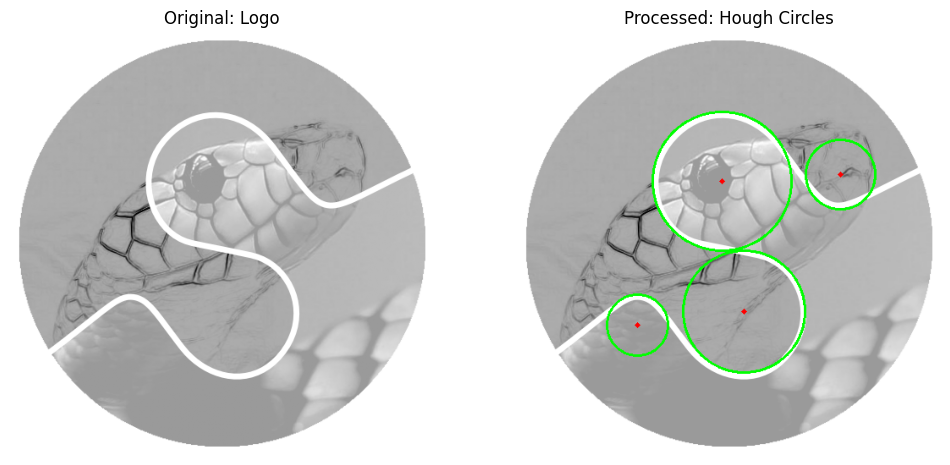


--- Processing: Cameraman ---
Found 0 circles.


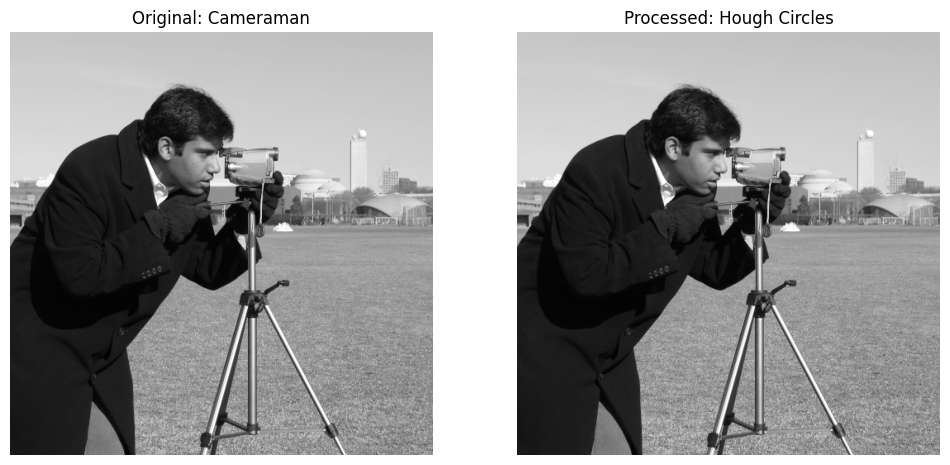


--- Processing: Astronaut ---
Found 70 circles!


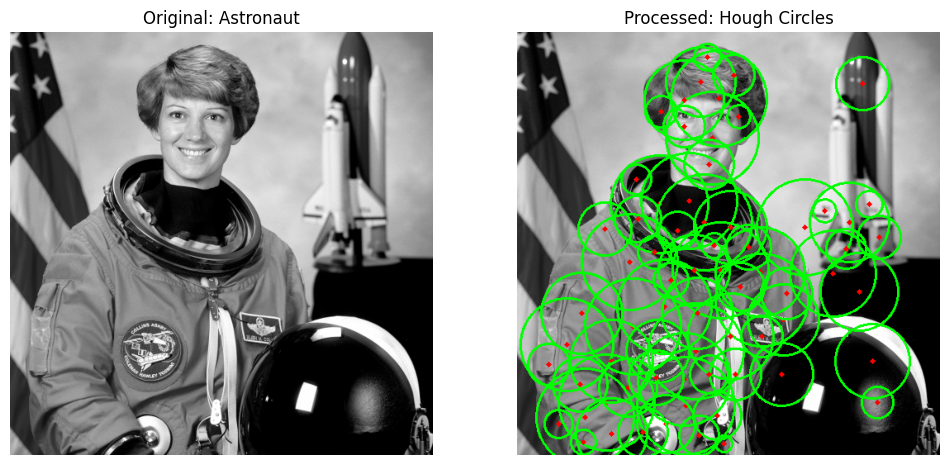


--- Processing: Checkerboard ---
Found 0 circles.


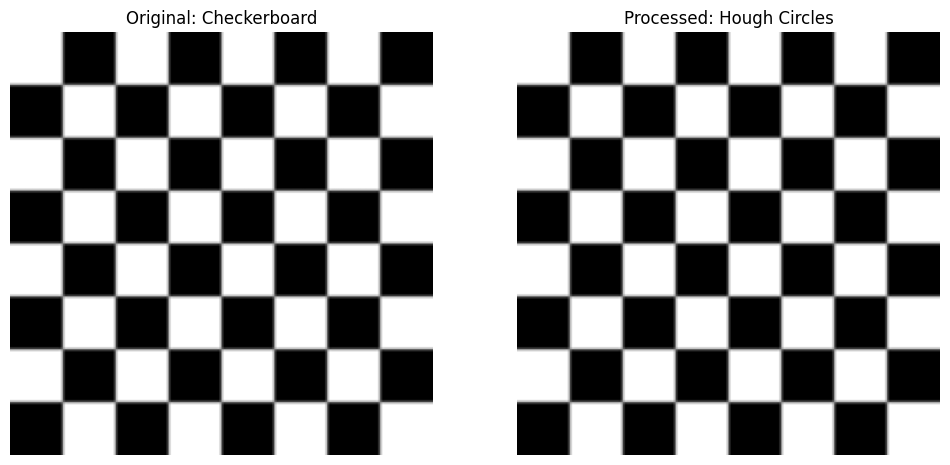

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import skimage

print("--- Starting Project 2: Hough Circle Detection Analysis (Unit 3) ---")

# --- We define a function to make processing reusable ---
def detect_and_show_circles(image_title, grayscale_image,
                            dp, minDist, param1, param2, minRadius, maxRadius):
    """
    A helper function to run HoughCircles and plot the results.
    """

    print(f"\n--- Processing: {image_title} ---")

    # --- 1. Pre-processing: Apply Median Blur ---
    # We must ensure the image is 8-bit (0-255) for cv2.medianBlur
    if grayscale_image.dtype != np.uint8:
        print("Image is not 8-bit, converting...")
        grayscale_image = (grayscale_image * 255).astype(np.uint8)

    gray_blurred = cv2.medianBlur(grayscale_image, 5)

    # --- 2. Apply the Hough Circle Transform ---
    detected_circles = cv2.HoughCircles(
        gray_blurred,
        cv2.HOUGH_GRADIENT,
        dp=dp,
        minDist=minDist,
        param1=param1,
        param2=param2,
        minRadius=minRadius,
        maxRadius=maxRadius
    )

    # --- 3. Draw the Detected Circles ---
    # Create a color version of the original image to draw on
    output_image = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2BGR)

    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles))
        print(f"Found {len(detected_circles[0, :])} circles!")

        for pt in detected_circles[0, :]:
            center_x, center_y, radius = pt[0], pt[1], pt[2]
            cv2.circle(output_image, (center_x, center_y), radius, (0, 255, 0), 2)
            cv2.circle(output_image, (center_x, center_y), 1, (0, 0, 255), 3)
    else:
        print("Found 0 circles.")

    # --- 4. Display the Results ---
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title(f"Original: {image_title}")
    plt.imshow(grayscale_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Processed: Hough Circles")
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# ======================================================================
# --- RUN 1: The 'Coins' Image ---
# ======================================================================
img_coins = data.coins()
# Parameters for Coins: (Relatively large, well-spaced circles)
detect_and_show_circles(
    image_title="Coins",
    grayscale_image=img_coins, # This is already 8-bit
    dp=1,
    minDist=20,     # Min distance between circles
    param1=150,     # Canny high threshold
    param2=30,      # "Confidence" threshold (lower = more circles)
    minRadius=10,   # Min size
    maxRadius=40    # Max size
)

# ======================================================================
# --- RUN 2: The 'Blobs' Image ---
# ======================================================================
# --- THIS IS THE CORRECTED LINE ---
# It's 'binary_blobs', which returns a boolean (True/False) array
img_blobs_bool = data.binary_blobs(length=256, blob_size_fraction=0.1, n_dim=2)

# Convert boolean (True/False) to 8-bit integer (255/0)
img_blobs = (img_blobs_bool * 255).astype(np.uint8)

# Parameters for Blobs: (Small, tightly packed circles)
detect_and_show_circles(
    image_title="Blobs",
    grayscale_image=img_blobs,
    dp=1,
    minDist=10,     # Circles are closer
    param1=50,      # Lower Canny threshold
    param2=10,      # Much lower confidence (blobs are "faint")
    minRadius=5,    # Min size is smaller
    maxRadius=15    # Max size is smaller
)

# ======================================================================
# --- RUN 3: The 'Logo' Image ---
# ======================================================================
# Load the logo (it's RGBA, 4-channel, 0-255 uint8)
img_logo_rgba = data.logo()
# Convert to grayscale
img_logo_gray = cv2.cvtColor(img_logo_rgba, cv2.COLOR_RGBA2GRAY)

# Parameters for Logo: (Sparse, large circles)
detect_and_show_circles(
    image_title="Logo",
    grayscale_image=img_logo_gray,
    dp=1,
    minDist=50,     # Circles are far apart
    param1=200,     # High Canny threshold for clean edges
    param2=30,      # Confidence
    minRadius=20,   # Min size
    maxRadius=100   # Max size is much larger
)

# ======================================================================
# --- RUN 4: The 'Cameraman' Image ---
# ======================================================================
# Load the cameraman (it's 0-255 uint8 grayscale)
img_camera = data.camera()

# Parameters for Cameraman: (Specific sizes to find the lens)
detect_and_show_circles(
    image_title="Cameraman",
    grayscale_image=img_camera,
    dp=1,
    minDist=50,
    param1=150,
    param2=30,
    minRadius=20,   # Tuned to find the lens
    maxRadius=50    # Tuned to find the lens
)

# ======================================================================
# --- RUN 5: The 'Astronaut' Image ---
# ======================================================================
img_astronaut = data.astronaut()
# Convert to grayscale
img_astronaut_gray = cv2.cvtColor(img_astronaut, cv2.COLOR_RGB2GRAY)

# Parameters for Astronaut: (Example parameters, might need tuning)
detect_and_show_circles(
    image_title="Astronaut",
    grayscale_image=img_astronaut_gray,
    dp=1,
    minDist=30,
    param1=100,
    param2=20,
    minRadius=10,
    maxRadius=60
)

# ======================================================================
# --- RUN 6: The 'Checkerboard' Image ---
# ======================================================================
img_checkerboard = data.checkerboard()
# Checkerboard is already grayscale

# Parameters for Checkerboard: (Example parameters, might need tuning)
detect_and_show_circles(
    image_title="Checkerboard",
    grayscale_image=img_checkerboard,
    dp=1,
    minDist=5,
    param1=50,
    param2=15,
    minRadius=3,
    maxRadius=10
)